In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sweetviz as sv

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns', 100)

In [264]:
df = pd.read_csv("Leads.csv")
df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


### Check the data

In [265]:
df.shape

(9240, 37)

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [267]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


In [268]:
(df.isnull().sum()).sum()

41039

In [269]:
# Check the data with sweetviz to understand the datapoints
sweet_report = sv.analyze(df)
sweet_report.show_html('sweet_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Based on the HTML report above, we will remove non-value adding columns where data categories do not offer any/much insights

In [270]:
df = df.drop(["Prospect ID","Lead Number","Do Not Call","Search","Magazine","Newspaper Article", "X Education Forums", "Newspaper",
             "Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses",
              "Update me on Supply Chain Content","Get updates on DM Content",
              "I agree to pay the amount through cheque"], axis = 1)
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [271]:
# Check the null values % in the dataset

df.isnull().sum()/len(df) * 100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     29.318182
City                                             15.3679

In [272]:
# Dropping all variables with more than 45% missing values

df.drop(df.columns[df.isna().sum() / len(df) *100 >45],axis=1,inplace=True)
df.isnull().sum()/len(df) * 100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Profile                                     29.318182
City                                             15.367965
A free copy of Mastering The Interview            0.0000

### Exploratory Data Analysis - Data impution and analysis

#### Univariate Analysis for numerical features

##### 1. TotalVisits - Impute using Median values

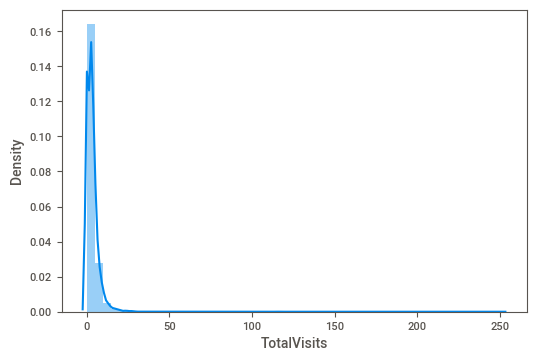

In [273]:
df["TotalVisits"].fillna(df["TotalVisits"].median(), inplace = True)
sns.distplot(df["TotalVisits"]);

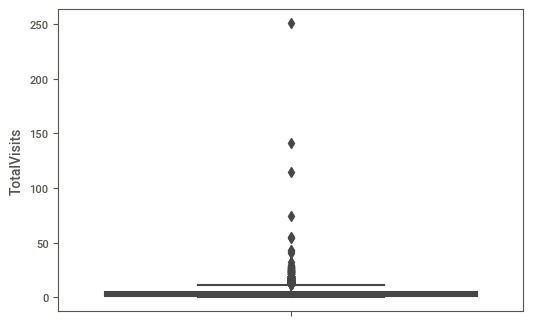

In [274]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['TotalVisits'])
plt.show()

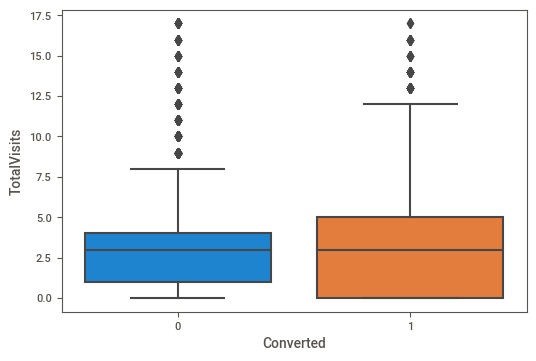

In [275]:
# There is an outlier available in the TotalVisits. We will run a outlier treatment for data beyond 99 percentile

Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q1)]
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df);

##### 2. Page Views per Visit - Impute using Median values

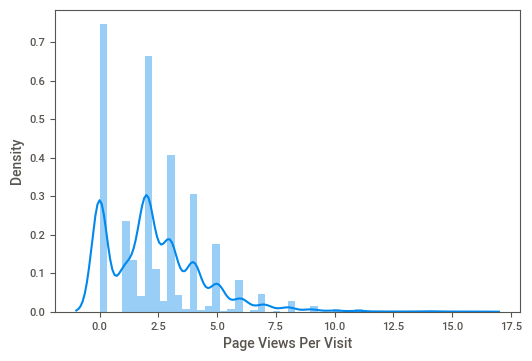

In [276]:
df["Page Views Per Visit"].fillna(df["Page Views Per Visit"].median(), inplace = True)
sns.distplot(df["Page Views Per Visit"]);

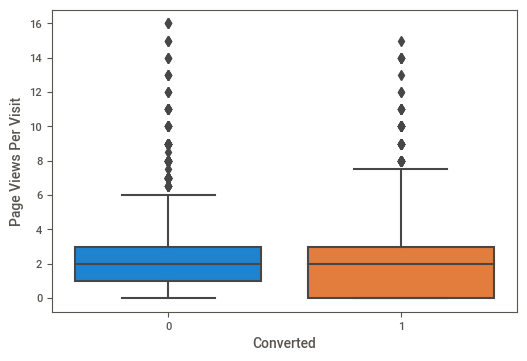

In [277]:
plt.figure(figsize=(6,4))
sns.boxplot(y='Page Views Per Visit', x = 'Converted', data = df);

##### 3. Total Time Spent on Website

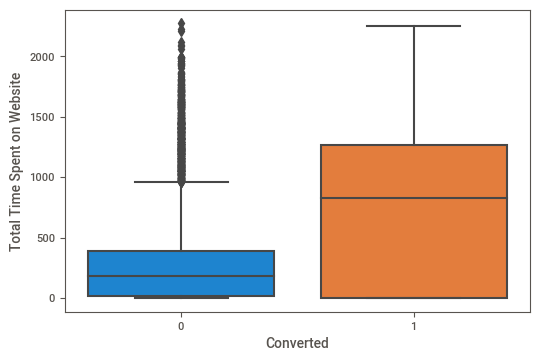

In [278]:
plt.figure(figsize=(6,4))
sns.boxplot(y='Total Time Spent on Website',x = 'Converted', data = df);

#### Categorical Variables Analysis

In [279]:
# We will create a function to plot the charts for bivariate analysis

def plot(df1, x, y, rot = 0):
    df2 = df1[[x,y]].value_counts().rename("Count").reset_index()
    plt.figure(figsize = [12,2])
    s1 = sns.barplot(data = df2, x = x, y = "Count", hue = y)
    s1.set_xticklabels(s1.get_xticklabels(),rotation=rot)
    plt.show()

#### Data Cleaning and analysis

##### 1. Lead Origin

In [280]:
df["Lead Origin"].value_counts(normalize = True, dropna = False)

Landing Page Submission    0.526373
API                        0.389210
Lead Add Form              0.078301
Lead Import                0.006006
Quick Add Form             0.000109
Name: Lead Origin, dtype: float64

In [281]:
# Combine the variables with low percentages together

df["Lead Origin"] = df["Lead Origin"].replace(["Lead Import","Quick Add Form"],"Other")

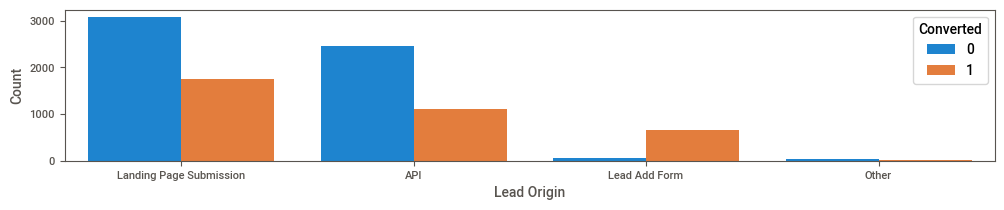

In [282]:
plot(df, "Lead Origin", "Converted")

##### 2. Lead Source

In [283]:
df["Lead Source"].value_counts(normalize = True, dropna = False)

Google               0.311237
Direct Traffic       0.274326
Olark Chat           0.191438
Organic Search       0.122857
Reference            0.058207
Welingak Website     0.015507
Referral Sites       0.013432
Facebook             0.006006
NaN                  0.003931
bing                 0.000655
google               0.000546
Click2call           0.000437
Social Media         0.000218
Live Chat            0.000218
Press_Release        0.000218
NC_EDM               0.000109
WeLearn              0.000109
youtubechannel       0.000109
Pay per Click Ads    0.000109
blog                 0.000109
welearnblog_Home     0.000109
testone              0.000109
Name: Lead Source, dtype: float64

In [284]:
df["Lead Source"] = df["Lead Source"].replace(["google"], "Google")
df["Lead Source"].fillna("Others", inplace = True)
df["Lead Source"] = df["Lead Source"].replace(["Welingak Website","Referral Sites","Facebook","bing","Click2call","Live Chat",
                                               "Social Media","Press_Release","WeLearn","NC_EDM","youtubechannel",
                                              "welearnblog_Home","Pay per Click Ads","testone","blog"], "Others")


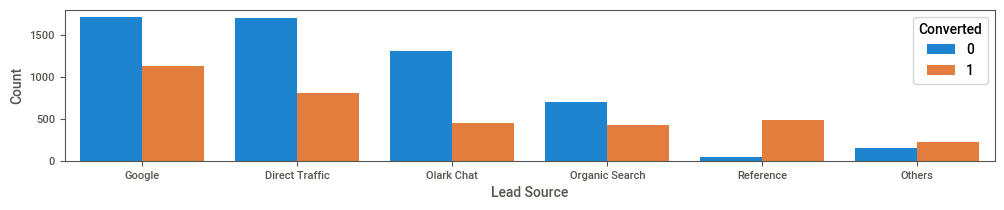

In [285]:
plot(df, "Lead Source","Converted" )

##### 3. Last Activity

In [286]:
df["Last Activity"].value_counts(normalize = True, dropna = False)

Email Opened                    0.372939
SMS Sent                        0.298023
Olark Chat Conversation         0.106039
Page Visited on Website         0.065742
Converted to Lead               0.046740
Email Bounced                   0.035492
Email Link Clicked              0.029049
Form Submitted on Website       0.012559
NaN                             0.011248
Unreachable                     0.010156
Unsubscribed                    0.006662
Had a Phone Conversation        0.003167
Approached upfront              0.000983
View in browser link Clicked    0.000546
Email Received                  0.000218
Email Marked Spam               0.000218
Resubscribed to emails          0.000109
Visited Booth in Tradeshow      0.000109
Name: Last Activity, dtype: float64

In [287]:
df["Last Activity"].fillna("Others", inplace = True)
df["Last Activity"] = df["Last Activity"].replace(["Form Submitted on Website","Unreachable","Unsubscribed",
                                              "Had a Phone Conversation","Approached upfront","View in browser link Clicked",
                                              "Email Marked Spam","Email Received","Visited Booth in Tradeshow",
                                              "Resubscribed to emails"], "Others")

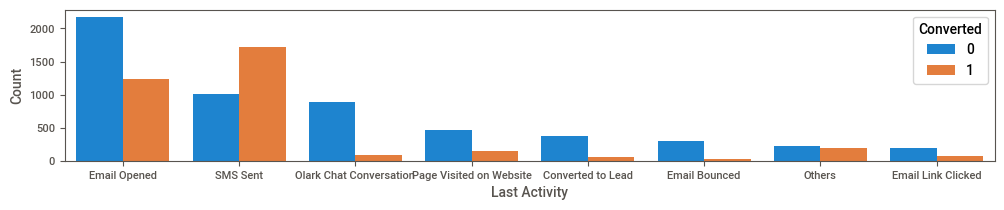

In [288]:
plot(df,"Last Activity","Converted")

##### 4. Country

In [289]:
df["Country"].value_counts(normalize = True, dropna = False)

India                   0.700229
NaN                     0.268756
United States           0.007426
United Arab Emirates    0.005679
Singapore               0.002621
Saudi Arabia            0.002293
United Kingdom          0.001638
Australia               0.001420
Qatar                   0.001092
Hong Kong               0.000764
Bahrain                 0.000764
France                  0.000655
Oman                    0.000655
Germany                 0.000437
South Africa            0.000437
Nigeria                 0.000437
Canada                  0.000437
unknown                 0.000437
Kuwait                  0.000437
Sweden                  0.000328
Philippines             0.000218
Italy                   0.000218
Netherlands             0.000218
China                   0.000218
Ghana                   0.000218
Bangladesh              0.000218
Belgium                 0.000218
Uganda                  0.000218
Asia/Pacific Region     0.000218
Vietnam                 0.000109
Tanzania  

In [290]:
df["Country"].fillna("Unknown", inplace = True)
df["Country"] = df["Country"].replace('unknown', "Unknown")
df["Country"] = df["Country"].replace(['Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'],"Others")


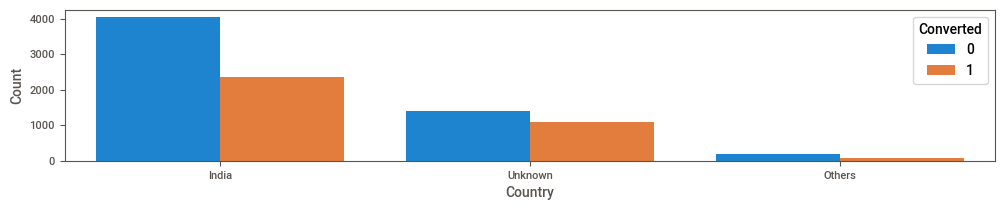

In [291]:
plot(df, "Country","Converted")

##### 5. Specialization

In [292]:
df["Specialization"].value_counts(normalize = True, dropna = False)

Select                               0.211423
NaN                                  0.156492
Finance Management                   0.105711
Human Resource Management            0.091296
Marketing Management                 0.090969
Operations Management                0.054712
Business Administration              0.043355
IT Projects Management               0.039642
Supply Chain Management              0.037785
Banking, Investment And Insurance    0.036038
Media and Advertising                0.021841
Travel and Tourism                   0.021623
International Business               0.019220
Healthcare Management                0.016818
Hospitality Management               0.012231
E-COMMERCE                           0.012122
Retail Management                    0.010593
Rural and Agribusiness               0.007644
E-Business                           0.006116
Services Excellence                  0.004368
Name: Specialization, dtype: float64

In [293]:
df["Specialization"].fillna("Not Specified", inplace = True)
df["Specialization"] = df["Specialization"].replace("Select", "Not Specified")
df["Specialization"] = df["Specialization"].replace(["Finance Management","Human Resource Management","Marketing Management",
                                                    "Operations Management","IT Projects Management","Supply Chain Management",
                                                    "Healthcare Management","Hospitality Management","Retail Management"], "Management")
df['Specialization']=df['Specialization'].replace(['E-COMMERCE','Rural and Agribusiness',
                                                       'E-Business','Services Excellence'],'Other')

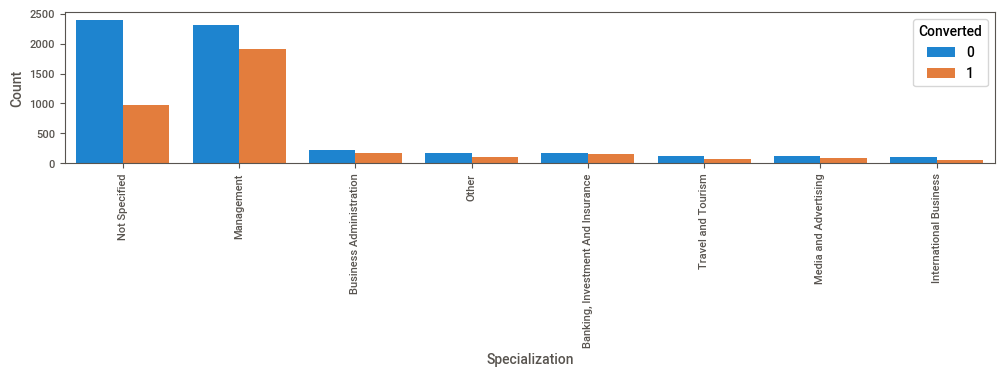

In [294]:
plot(df, "Specialization","Converted",90)

##### 6. How did you hear about X Education

In [295]:
df["How did you hear about X Education"].value_counts(normalize = True, dropna = False)

Select                   0.545921
NaN                      0.239271
Online Search            0.086928
Word Of Mouth            0.037676
Student of SomeSchool    0.033854
Other                    0.019876
Multiple Sources         0.016599
Advertisements           0.007317
Social Media             0.007208
Email                    0.002839
SMS                      0.002512
Name: How did you hear about X Education, dtype: float64

In [296]:
df["How did you hear about X Education"].fillna("Not Specified", inplace = True)
df["How did you hear about X Education"] = df["How did you hear about X Education"].replace("Select", "Not Specified")
df["How did you hear about X Education"] = df["How did you hear about X Education"].replace(["Other","Multiple Sources","Advertisements","Social Media",
                                                     "Email","SMS"], "Others")

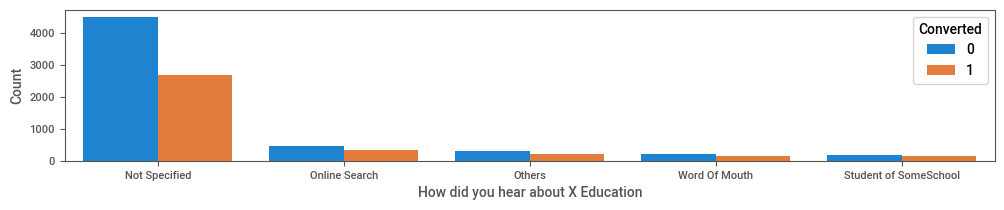

In [297]:
plot(df, "How did you hear about X Education", "Converted")

##### 7. What is your current occupation

In [298]:
df["What is your current occupation"].value_counts(normalize = True, dropna = False)

Unemployed              0.605548
NaN                     0.291799
Working Professional    0.076335
Student                 0.022824
Other                   0.001529
Housewife               0.001092
Businessman             0.000874
Name: What is your current occupation, dtype: float64

In [299]:
df["What is your current occupation"].fillna("Not Specified", inplace = True)
df["What is your current occupation"] = df["What is your current occupation"].replace(["Other","Housewife","Businessman"], "Others")

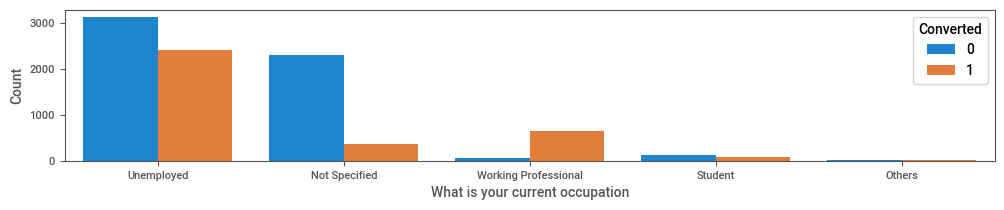

In [300]:
plot(df, "What is your current occupation", "Converted")

##### 8. What matters most to you in choosing a course

In [301]:
df["What matters most to you in choosing a course"].value_counts(normalize = True, dropna = False)

Better Career Prospects      0.705908
NaN                          0.293764
Flexibility & Convenience    0.000218
Other                        0.000109
Name: What matters most to you in choosing a course, dtype: float64

In [302]:
df["What matters most to you in choosing a course"].fillna("Other", inplace = True)
df["What matters most to you in choosing a course"] = df["What matters most to you in choosing a course"].replace(["Flexibility & Convenience"], "Other")

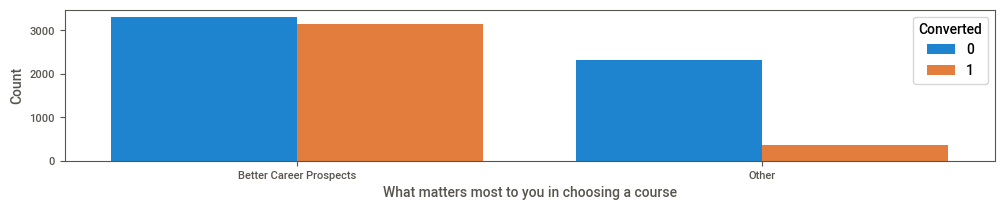

In [303]:
plot(df, "What matters most to you in choosing a course", "Converted")

##### 9. Tags

In [304]:
df["Tags"].value_counts(normalize = True, dropna = False)

NaN                                                  0.363438
Will revert after reading the email                  0.224309
Ringing                                              0.129628
Interested in other courses                          0.055695
Already a student                                    0.050672
Closed by Horizzon                                   0.038113
switched off                                         0.026100
Busy                                                 0.020312
Lost to EINS                                         0.018893
Not doing further education                          0.015070
Interested  in full time MBA                         0.012777
Graduation in progress                               0.012122
invalid number                                       0.009064
Diploma holder (Not Eligible)                        0.006880
wrong number given                                   0.005133
opp hangup                                           0.003604
number n

In [305]:
df["Tags"].fillna("Not Specified", inplace = True)
df["Tags"] = df["Tags"].replace(['Diploma holder (Not Eligible)', 'Graduation in progress',
                                 'number not provided', 'opp hangup',
                                 'Not doing further education', 'invalid number',
                                 'wrong number given', 'Interested  in full time MBA',
                                 'Still Thinking', 'Lost to Others',
                                 'Shall take in the next coming month', 'Lateral student',
                                 'Interested in Next batch', 'Recognition issue (DEC approval)',
                                 'Want to take admission but has financial problems',
                                 'University not recognized', 'in touch with EINS','In confusion whether part time or DLP',
                                 "Busy"], "Others")

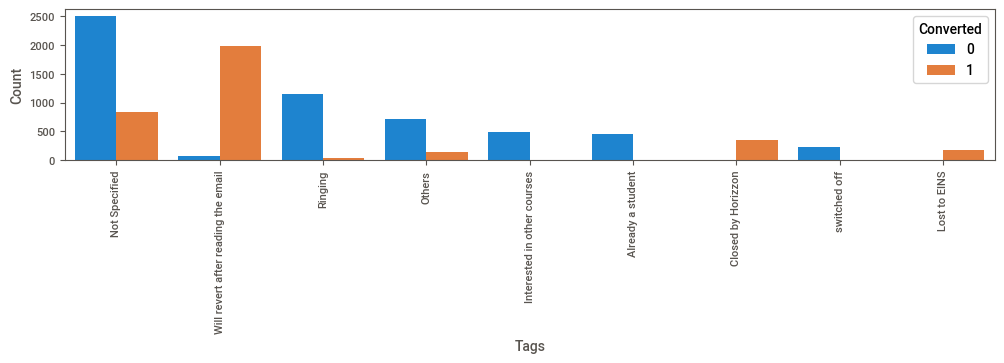

In [306]:
plot(df, "Tags", "Converted",90)

##### 10. Lead Profile

In [307]:
df["Lead Profile"].value_counts(normalize = True, dropna = False)

Select                         0.448291
NaN                            0.293764
Potential Lead                 0.174293
Other Leads                    0.052528
Student of SomeSchool          0.026319
Lateral Student                0.002621
Dual Specialization Student    0.002184
Name: Lead Profile, dtype: float64

In [308]:
df["Lead Profile"].fillna("Not Specified", inplace = True)
df["Lead Profile"] = df["Lead Profile"].replace("Select", "Not Specified")
df["Lead Profile"] = df["Lead Profile"].replace(["Lateral Student","Dual Specialization Student",
                                                "Student of SomeSchool"], "Other Leads")

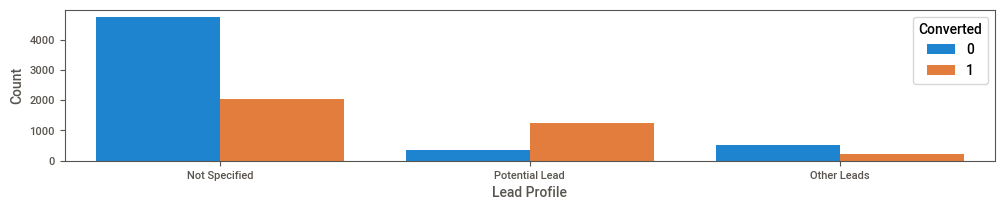

In [309]:
plot(df,"Lead Profile","Converted")

##### 11. City

In [310]:
df["City"].value_counts(normalize = True, dropna = False)

Mumbai                         0.347057
Select                         0.245168
NaN                            0.154527
Thane & Outskirts              0.080594
Other Cities                   0.073933
Other Cities of Maharashtra    0.049798
Other Metro Cities             0.040952
Tier II Cities                 0.007972
Name: City, dtype: float64

In [311]:
df["City"].fillna("Not Specified", inplace = True)
df["City"] = df["City"].replace(["Select"], "Not Specified")
df["City"] = df["City"].replace(["Tier II Cities"], "Other Cities")
df["City"] = df["City"].replace(["Thane & Outskirts"], "Other Cities of Maharashtra")

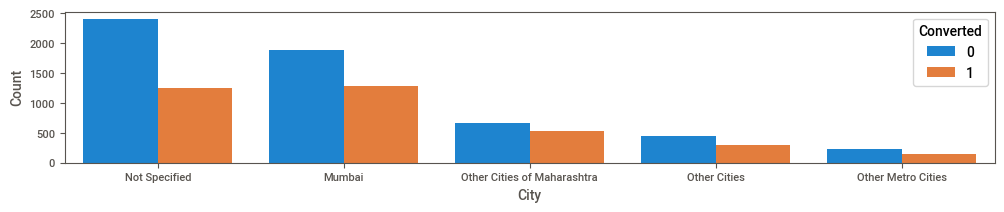

In [312]:
plot(df, "City","Converted")

In [313]:
df.isnull().sum()/len(df) * 100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Tags                                             0.0
Lead Profile                                     0.0
City                                             0.0
A free copy of Mastering The Interview           0.0
Last Notable Activity                            0.0
dtype: float64

##### 12. A free copy of Mastering the Interview

In [314]:
df["A free copy of Mastering The Interview"].value_counts(normalize = True, dropna = False)

No     0.690182
Yes    0.309818
Name: A free copy of Mastering The Interview, dtype: float64

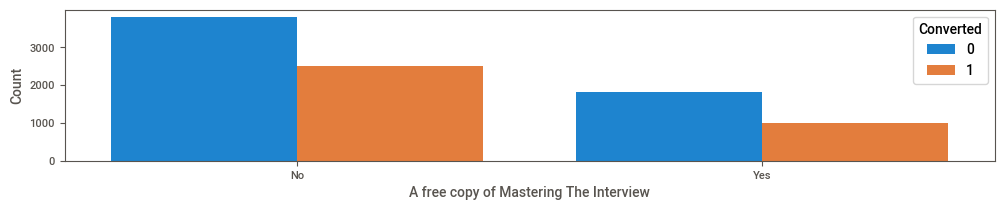

In [315]:
plot(df, "A free copy of Mastering The Interview", "Converted")

##### 13. Last Notable Activity

In [316]:
df["Last Notable Activity"].value_counts(normalize = True, dropna = False)

Modified                        0.370209
Email Opened                    0.306541
SMS Sent                        0.235776
Page Visited on Website         0.031561
Olark Chat Conversation         0.019876
Email Link Clicked              0.018783
Email Bounced                   0.006443
Unsubscribed                    0.005133
Unreachable                     0.003495
Had a Phone Conversation        0.001420
Email Marked Spam               0.000218
Email Received                  0.000109
Resubscribed to emails          0.000109
View in browser link Clicked    0.000109
Form Submitted on Website       0.000109
Approached upfront              0.000109
Name: Last Notable Activity, dtype: float64

In [317]:
df["Last Notable Activity"].unique()

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [318]:
df["Last Notable Activity"] = df["Last Notable Activity"].replace(['Email Bounced','Unreachable','Unsubscribed', 'Had a Phone Conversation', 'Approached upfront',
                                                                   'Resubscribed to emails', 'View in browser link Clicked',
                                                                   'Form Submitted on Website', 'Email Received','Email Marked Spam'], "Others")

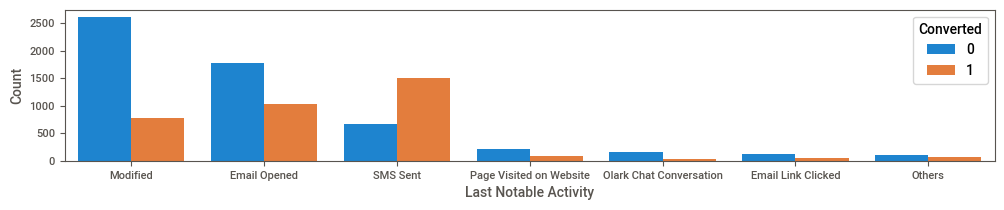

In [319]:
plot(df,"Last Notable Activity", "Converted")

In [320]:
# Check the null values again since we have cleaned the data, imputed the data and dropped some columns

df.isnull().sum()/len(df) * 100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Tags                                             0.0
Lead Profile                                     0.0
City                                             0.0
A free copy of Mastering The Interview           0.0
Last Notable Activity                            0.0
dtype: float64

In [321]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

### Model Building

#### Convert dataset into dummies and rename the columns

In [322]:
# Renaming some columns to make it easy for further analysis

df.rename(columns = {'Total Time Spent on Website':"time_website", 'Page Views Per Visit':"page_views_visit",
                     'How did you hear about X Education':'heard_x_education',
                     'What is your current occupation':"current_occ",'What matters most to you in choosing a course':"reason_course",
                     'A free copy of Mastering The Interview': "free_copy", 'Last Notable Activity':"notable_activity"}, inplace = True)

In [323]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,time_website,page_views_visit,Last Activity,Country,Specialization,heard_x_education,current_occ,reason_course,Tags,Lead Profile,City,free_copy,notable_activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unknown,Not Specified,Not Specified,Unemployed,Better Career Prospects,Interested in other courses,Not Specified,Not Specified,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Not Specified,Not Specified,Unemployed,Better Career Prospects,Ringing,Not Specified,Not Specified,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Not Specified,Student,Better Career Prospects,Will revert after reading the email,Potential Lead,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Ringing,Not Specified,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Not Specified,Others,Unemployed,Better Career Prospects,Will revert after reading the email,Not Specified,Mumbai,No,Modified


In [324]:
varlist =["Do Not Email", "free_copy"]

def binary_map(x):
    return x.map({"Yes":1, "No":0})

# Applying the function to the binary features to map
df[varlist] = df[varlist].apply(binary_map)

In [325]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'time_website', 'page_views_visit', 'Last Activity',
       'Country', 'Specialization', 'heard_x_education', 'current_occ',
       'reason_course', 'Tags', 'Lead Profile', 'City', 'free_copy',
       'notable_activity'],
      dtype='object')

In [326]:
dum_col = ['Lead Origin', 'Lead Source','Last Activity','Country','Specialization', 'heard_x_education','current_occ',
           "reason_course",'Tags','Lead Profile', 'City','notable_activity']

df1 = pd.DataFrame()
for var,i in enumerate(dum_col):
    df2 = pd.get_dummies(df[i], drop_first = True, prefix = i)
    df1 = pd.concat([df1,df2], axis = 1)


df1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Other,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Others,Country_Unknown,Specialization_Business Administration,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Other,Specialization_Travel and Tourism,heard_x_education_Online Search,heard_x_education_Others,heard_x_education_Student of SomeSchool,heard_x_education_Word Of Mouth,current_occ_Others,current_occ_Student,current_occ_Unemployed,current_occ_Working Professional,reason_course_Other,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Profile_Other Leads,Lead Profile_Potential Lead,City_Not Specified,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,notable_activity_Email Opened,notable_activity_Modified,notable_activity_Olark Chat Conversation,notable_activity_Others,notable_activity_Page Visited on Website,notable_activity_SMS Sent
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [327]:
df = pd.concat([df,df1], axis = 1)

In [328]:
df.drop(dum_col, axis = 1,inplace = True)
df.head()

,Do Not Email,Converted,TotalVisits,time_website,page_views_visit,free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Other,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Others,Country_Unknown,Specialization_Business Administration,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Other,Specialization_Travel and Tourism,heard_x_education_Online Search,heard_x_education_Others,heard_x_education_Student of SomeSchool,heard_x_education_Word Of Mouth,current_occ_Others,current_occ_Student,current_occ_Unemployed,current_occ_Working Professional,reason_course_Other,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Profile_Other Leads,Lead Profile_Potential Lead,City_Not Specified,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,notable_activity_Email Opened,notable_activity_Modified,notable_activity_Olark Chat Conversation,notable_activity_Others,notable_activity_Page Visited on Website,notable_activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


#### Train test split datasets

In [329]:
X=df.drop(['Converted'],axis=1)
y=df['Converted']

In [330]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [331]:

scaler = MinMaxScaler()
X_train[['TotalVisits', 'time_website','page_views_visit']] = scaler.fit_transform(X_train[['TotalVisits', 'time_website','page_views_visit']])
X_train.head()

,Do Not Email,TotalVisits,time_website,page_views_visit,free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Other,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Others,Country_Unknown,Specialization_Business Administration,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Other,Specialization_Travel and Tourism,heard_x_education_Online Search,heard_x_education_Others,heard_x_education_Student of SomeSchool,heard_x_education_Word Of Mouth,current_occ_Others,current_occ_Student,current_occ_Unemployed,current_occ_Working Professional,reason_course_Other,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Profile_Other Leads,Lead Profile_Potential Lead,City_Not Specified,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,notable_activity_Email Opened,notable_activity_Modified,notable_activity_Olark Chat Conversation,notable_activity_Others,notable_activity_Page Visited on Website,notable_activity_SMS Sent
6490,0,0.058824,0.014376,0.06250,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4026,1,0.176471,0.076370,0.09375,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
6453,0,0.705882,0.185984,0.37500,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8949,0,0.352941,0.072327,0.09375,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0
6467,0,0.647059,0.030099,0.68750,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [332]:
df.corr()

,Do Not Email,Converted,TotalVisits,time_website,page_views_visit,free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Other,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Others,Country_Unknown,Specialization_Business Administration,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Other,Specialization_Travel and Tourism,heard_x_education_Online Search,heard_x_education_Others,heard_x_education_Student of SomeSchool,heard_x_education_Word Of Mouth,current_occ_Others,current_occ_Student,current_occ_Unemployed,current_occ_Working Professional,reason_course_Other,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Profile_Other Leads,Lead Profile_Potential Lead,City_Not Specified,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,notable_activity_Email Opened,notable_activity_Modified,notable_activity_Olark Chat Conversation,notable_activity_Others,notable_activity_Page Visited on Website,notable_activity_SMS Sent
Do Not Email,1.000000,-0.133678,-0.009751,-0.046381,0.023925,0.054381,0.093294,-0.019886,-0.012435,-0.068932,-0.049865,0.037040,0.008825,-0.037736,0.625192,-0.043153,-0.217212,-0.054172,0.077709,0.067026,-0.013938,0.054484,-0.047669,0.005818,0.006570,0.001920,0.000945,-0.036918,0.055326,0.060080,-0.043759,-0.028916,-0.023091,-0.021378,-0.010372,0.007173,-0.018446,-0.050110,0.056329,-0.053772,-0.026471,-0.031489,0.059511,0.082812,-0.019295,-0.092416,0.028776,0.026460,-0.064259,-0.051935,0.019678,-0.006629,0.040280,-0.186733,0.118334,-0.012380,0.301649,0.035741,-0.023033
Converted,-0.133678,1.000000,0.043811,0.361979,-0.003569,-0.040336,-0.051452,0.323304,-0.021756,0.018394,-0.129960,-0.007569,0.085749,0.272063,-0.120222,-0.039285,-0.034626,-0.212698,0.031008,-0.082174,0.327516,-0.033614,0.064311,0.022233,-0.006132,0.126702,0.009228,-0.153536,-0.006069,-0.009598,0.025953,0.004248,0.029368,0.020264,0.040624,-0.005192,0.129703,0.313508,-0.328880,0.249264,-0.180389,0.168810,-0.210029,-0.148541,-0.282595,0.644748,-0.123882,-0.052588,0.377813,-0.070983,0.006782,0.050233,0.008656,-0.024124,-0.244479,-0.074067,0.002030,-0.034983,0.353658
TotalVisits,-0.009751,0.043811,1.000000,0.343668,0.740431,0.281601,0.426014,-0.249059,-0.045511,0.204556,-0.470797,0.291083,-0.051595,-0.209460,-0.063699,-0.027441,0.063672,-0.203783,0.036928,0.212820,0.018311,0.040591,-0.579411,0.064880,0.057657,0.223261,0.068537,-0.377649,0.071445,0.098326,0.175253,0.107846,0.089488,0.106808,0.019004,-0.030459,0.074124,-0.002566,-0.072452,0.006312,-0.004009,0.011279,-0.114956,0.040400,0.081399,0.050746,0.034454,-0.000688,0.005684,-0.410807,0.085361,0.116120,0.071219,0.080190,-0.142834,-0.055133,0.011809,0.186090,0.016281
time_website,-0.046381,0.361979,0.343668,1.000000,0.329966,0.169653,0.277552,-0.139634,-0.030154,0.206690,-0.378402,0.095624,-0.068331,-0.107233,-0.028553,-0.040996,0.000710,-0.193063,0.059568,0.027377,0.118317,0.027304,-0.437994,0.051569,0.021532,0.205601,0.039672,-0.288766,0.022502,0.042310,0.103878,0.085496,0.065283,0.073027,0.029512,-0.013636,0.088205,0.097143,-0.151092,0.071076,-0.055404,0.074595,-0.156626,-0.015712,-0.055920,0.259189,-0.027250,-0.008533,0.123608,-0.289299,0.060110,0.104565,0.050599,0.009496,-0.107072,-0.053116,0.011344,0.027398,0.125958
page_views_visit,0.023925,-0.003569,0.740431,0.329966,1.000000,0.284808,0.505168,-0.271820,-0.049679,0.226142,-0.519611,0.311874,-0.062377,-0.227612,-0.036828,-0.037863,0.067018,-0.233670,0.034193,0.103452,0.073017,0.039345,-0.619354,0.06

In [333]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(f"Training Accuracy: {lr.score(X_train,y_train)}")
# print(lr.score(X_train,y_train))
print(f"Testing Accuracy: {(lr.score(X_test,y_test))}\n")
# print(lr.score(X_test,y_test))

predicted = lr.predict(X_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

Training Accuracy: 0.9400842565142769
Testing Accuracy: 0.5181950509461426

[[ 390 1313]
 [  11 1034]]
              precision    recall  f1-score   support

           0       0.97      0.23      0.37      1703
           1       0.44      0.99      0.61      1045

    accuracy                           0.52      2748
   macro avg       0.71      0.61      0.49      2748
weighted avg       0.77      0.52      0.46      2748



In [334]:
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [335]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 4),
 ('TotalVisits', False, 2),
 ('time_website', True, 1),
 ('page_views_visit', False, 14),
 ('free_copy', False, 40),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Other', False, 5),
 ('Lead Source_Google', False, 26),
 ('Lead Source_Olark Chat', False, 13),
 ('Lead Source_Organic Search', False, 27),
 ('Lead Source_Others', False, 15),
 ('Lead Source_Reference', True, 1),
 ('Last Activity_Email Bounced', False, 11),
 ('Last Activity_Email Link Clicked', False, 37),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', False, 12),
 ('Last Activity_Others', False, 36),
 ('Last Activity_Page Visited on Website', False, 38),
 ('Last Activity_SMS Sent', True, 1),
 ('Country_Others', False, 25),
 ('Country_Unknown', True, 1),
 ('Specialization_Business Administration', False, 23),
 ('Specialization_International Business', False, 33),
 ('Specialization_Management', False

In [336]:
col = X_train.columns[rfe.support_]
col

Index(['time_website', 'Lead Origin_Lead Add Form', 'Lead Source_Reference',
       'Last Activity_Email Opened', 'Last Activity_SMS Sent',
       'Country_Unknown', 'reason_course_Other', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not Specified', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'notable_activity_SMS Sent'],
      dtype='object')

#### Model Building

In [337]:
#Assign Columns
X_train1 = X_train[col]

#Add Constant
X_train1_sm = sm.add_constant(X_train1)

#Create Model
lm1 = sm.GLM(y_train,X_train1_sm, family=sm.families.Binomial())
result = lm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6393
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1180.4
Date:                Mon, 08 Nov 2021   Deviance:                       2360.7
Time:                        19:58:36   Pearson chi2:                 1.12e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.8819      0.203    -24.038      0.000      -5.280      -4.484
time_website                                 4.2448      0.258     16.426      0.000       3.738       4.751
Lead Origin_Lead Add Form                    2.2771      0.558      4.084      0.000       1.184       3.370
Lead Source_Reference                       -2.4417      0.648     -3.765      0.000      -3.713      -1.171
Last Activity_Email Opened                   1.1582      0.145      8.003      0.000       0.875       1.442
Last Activity_SMS Sent                       1.6588      0.220      7.542      0.000       1.228       2.090
Country_Unknown                              1.0174      0.155      6.544      0.000       0.713       1.322
reason_course_Other                         -2.6649      0.156    -17.101      0.000      -2.970      -2.359
Tags_Closed by Horizzon                      7.6410      0.758     10.082      0.000       6.156       9.126
Tags_Interested in other courses            -1.4216      0.469     -3.034      0.002      -2.340      -0.503
Tags_Lost to EINS                            7.4969      0.570     13.162      0.000       6.381       8.613
Tags_Not Specified                           2.9237      0.188     15.537      0.000       2.555       3.293
Tags_Ringing                                -2.6161      0.282     -9.292      0.000      -3.168      -2.064
Tags_Will revert after reading the email     5.4509      0.217     25.118      0.000       5.026       5.876
Tags_switched off                           -3.4548      0.742     -4.656      0.000      -4.909      -2.000
notable_activity_SMS Sent                    1.8708      0.213      8.788      0.000       1.454       2.288
============================================================================================================
"""

In [338]:
# Check for Co-linearity
X=X_train1
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']= [round(variance_inflation_factor(X.values,i),2) for i in range(X.shape[1]) ]
vif.sort_values('VIF',ascending=False)  

,Features,VIF
10,Tags_Not Specified,6.26
4,Last Activity_SMS Sent,5.57
14,notable_activity_SMS Sent,5.07
1,Lead Origin_Lead Add Form,4.80
6,reason_course_Other,4.56
2,Lead Source_Reference,4.47
12,Tags_Will revert after reading the email,2.53
0,time_website,2.30
5,Country_Unknown,2.02
3,Last Activity_Email Opened,1.96


#### Model Number 2

In [339]:
col = col.drop('Tags_Not Specified')

In [340]:
#Assign Columns
X_train2=X_train[col]

#Add Constant
X_train2_sm =sm.add_constant(X_train2)

#Create Model
lm2=sm.GLM(y_train,X_train2_sm, family=sm.families.Binomial())
result=lm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6394
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1323.8
Date:                Mon, 08 Nov 2021   Deviance:                       2647.6
Time:                        19:58:36   Pearson chi2:                 1.20e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.7109      0.159    -23.346      0.000      -4.022      -3.399
time_website                                 4.3250      0.245     17.667      0.000       3.845       4.805
Lead Origin_Lead Add Form                    3.3858      0.513      6.605      0.000       2.381       4.391
Lead Source_Reference                       -3.8014      0.609     -6.244      0.000      -4.995      -2.608
Last Activity_Email Opened                   1.2558      0.136      9.250      0.000       0.990       1.522
Last Activity_SMS Sent                       1.5665      0.212      7.386      0.000       1.151       1.982
Country_Unknown                              1.4500      0.144     10.054      0.000       1.167       1.733
reason_course_Other                         -1.1046      0.116     -9.513      0.000      -1.332      -0.877
Tags_Closed by Horizzon                      6.3502      0.750      8.462      0.000       4.879       7.821
Tags_Interested in other courses            -2.7641      0.454     -6.094      0.000      -3.653      -1.875
Tags_Lost to EINS                            5.2836      0.528     10.014      0.000       4.249       6.318
Tags_Ringing                                -3.9458      0.265    -14.908      0.000      -4.465      -3.427
Tags_Will revert after reading the email     4.1465      0.184     22.534      0.000       3.786       4.507
Tags_switched off                           -4.7499      0.736     -6.456      0.000      -6.192      -3.308
notable_activity_SMS Sent                    2.0063      0.206      9.735      0.000       1.602       2.410
============================================================================================================
"""

In [341]:
# Check for Co-linearity
X=X_train2
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']= [round(variance_inflation_factor(X.values,i),2) for i in range(X.shape[1]) ]
vif.sort_values('VIF',ascending=False)

,Features,VIF
4,Last Activity_SMS Sent,5.47
13,notable_activity_SMS Sent,5.05
1,Lead Origin_Lead Add Form,4.63
2,Lead Source_Reference,4.30
11,Tags_Will revert after reading the email,2.14
0,time_website,2.13
5,Country_Unknown,1.81
3,Last Activity_Email Opened,1.80
6,reason_course_Other,1.59
7,Tags_Closed by Horizzon,1.35


#### Model Number 3

In [342]:
col = col.drop('Last Activity_SMS Sent')

In [343]:
#Assign Columns
X_train3=X_train[col]

#Add Constant
X_train3_sm =sm.add_constant(X_train3)

#Create Model
lm3=sm.GLM(y_train,X_train3_sm, family=sm.families.Binomial())
result=lm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6395
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1349.4
Date:                Mon, 08 Nov 2021   Deviance:                       2698.8
Time:                        19:58:37   Pearson chi2:                 1.18e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.3736      0.145    -23.274      0.000      -3.658      -3.089
time_website                                 4.3362      0.244     17.807      0.000       3.859       4.813
Lead Origin_Lead Add Form                    3.5512      0.506      7.012      0.000       2.559       4.544
Lead Source_Reference                       -3.7946      0.599     -6.333      0.000      -4.969      -2.620
Last Activity_Email Opened                   0.9081      0.121      7.510      0.000       0.671       1.145
Country_Unknown                              1.3819      0.142      9.734      0.000       1.104       1.660
reason_course_Other                         -1.0260      0.114     -8.981      0.000      -1.250      -0.802
Tags_Closed by Horizzon                      6.2262      0.743      8.382      0.000       4.770       7.682
Tags_Interested in other courses            -2.7757      0.451     -6.151      0.000      -3.660      -1.891
Tags_Lost to EINS                            5.2963      0.527     10.044      0.000       4.263       6.330
Tags_Ringing                                -3.9201      0.265    -14.810      0.000      -4.439      -3.401
Tags_Will revert after reading the email     4.1145      0.181     22.766      0.000       3.760       4.469
Tags_switched off                           -4.7036      0.736     -6.392      0.000      -6.146      -3.261
notable_activity_SMS Sent                    3.2099      0.142     22.570      0.000       2.931       3.489
============================================================================================================
"""

In [344]:
# Check for Co-linearity
X=X_train3
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']= [round(variance_inflation_factor(X.values,i),2) for i in range(X.shape[1]) ]
vif.sort_values('VIF',ascending=False)

,Features,VIF
1,Lead Origin_Lead Add Form,4.60
2,Lead Source_Reference,4.29
0,time_website,2.10
10,Tags_Will revert after reading the email,2.10
4,Country_Unknown,1.81
12,notable_activity_SMS Sent,1.74
3,Last Activity_Email Opened,1.71
5,reason_course_Other,1.51
6,Tags_Closed by Horizzon,1.35
9,Tags_Ringing,1.28


### Evaluating the Model

In [345]:
y_train_pred = result.predict(sm.add_constant(X_train3_sm))
y_train_pred[:10]

6490    0.035187
4026    0.541769
6453    0.655380
8949    0.876820
6467    0.018830
3481    0.028022
2209    0.029255
1608    0.002020
2969    0.065973
8560    0.076756
dtype: float64

In [346]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.03518724, 0.54176919, 0.65537963, 0.87681964, 0.01882963,
       0.02802245, 0.02925494, 0.00201954, 0.06597289, 0.07675614])

In [347]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.035187,6490
1,1,0.541769,4026
2,1,0.655380,6453
3,1,0.876820,8949
4,0,0.018830,6467


In [348]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.035187,6490,0
1,1,0.541769,4026,1
2,1,0.655380,6453,1
3,1,0.876820,8949,1
4,0,0.018830,6467,0


In [349]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3743  186]
 [ 307 2173]]


In [350]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9230769230769231


In [351]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [352]:
print(f'Sensitivity : {TP/(TP+FN)}')
print(f'Specificity : {TN/(TN+FP)}\n')

Sensitivity : 0.8762096774193548
Specificity : 0.9526597098498346



### Finding an optimal cutoff

In [353]:
# ROC function

def draw_roc( actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [354]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

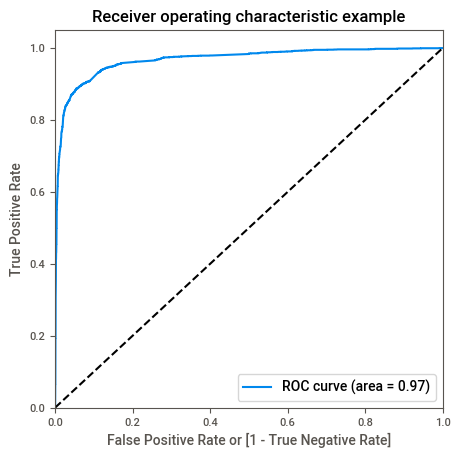

In [355]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

##### ROC should be ideally 1 and we are getting 0.97, indicating it is a good predictive model

In [356]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.035187,6490,0,1,0,0,0,0,0,0,0,0,0
1,1,0.541769,4026,1,1,1,1,1,1,1,0,0,0,0
2,1,0.655380,6453,1,1,1,1,1,1,1,1,0,0,0
3,1,0.876820,8949,1,1,1,1,1,1,1,1,1,1,0
4,0,0.018830,6467,0,1,0,0,0,0,0,0,0,0,0


In [357]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','recall','precision', 'F1'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])    
    acc = (cm[0,0]+cm[1,1])/sum(sum(cm))
    
    spec = cm[0,0]/(cm[0,0]+cm[0,1])
    sens = rec = cm[1,1]/(cm[1,1]+cm[1,0])
    prec = cm[1,1]/(cm[1,1]+cm[0,1])
    
    f1=2*rec*prec/ (prec+rec)
    cutoff_df.loc[i]=[i,acc,sens,spec,rec,prec,f1]
    
print(cutoff_df)

     prob  accuracy     sensi     speci    recall  precision        F1
0.0   0.0  0.386956  1.000000  0.000000  1.000000   0.386956  0.557993
0.1   0.1  0.823998  0.968548  0.732756  0.968548   0.695829  0.809845
0.2   0.2  0.901545  0.941532  0.876304  0.941532   0.827721  0.880966
0.3   0.3  0.914807  0.903226  0.922118  0.903226   0.879811  0.891365
0.4   0.4  0.920580  0.888306  0.940952  0.888306   0.904723  0.896439
0.5   0.5  0.923077  0.876210  0.952660  0.876210   0.921153  0.898119
0.6   0.6  0.921205  0.847581  0.967676  0.847581   0.943024  0.892759
0.7   0.7  0.918708  0.830242  0.974548  0.830242   0.953682  0.887691
0.8   0.8  0.901545  0.774597  0.981675  0.774597   0.963874  0.858931
0.9   0.9  0.876424  0.697581  0.989310  0.697581   0.976298  0.813735


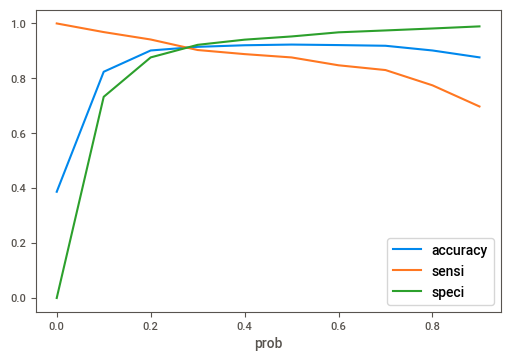

In [358]:
# Plotting accuracy, sensitivity and specificity

cutoff_df.plot(x='prob',y=['accuracy', 'sensi','speci'])
plt.show()

In [359]:
# From the curve above, 0.26 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.26 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.035187,6490,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.541769,4026,1,1,1,1,1,1,1,0,0,0,0,1
2,1,0.655380,6453,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.876820,8949,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.018830,6467,0,1,0,0,0,0,0,0,0,0,0,0


In [360]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_Prob','Prospect ID','final_predicted','Lead_Score']].head(20)

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score
0,0,0.035187,6490,0,4
1,1,0.541769,4026,1,54
2,1,0.655380,6453,1,66
3,1,0.876820,8949,1,88
4,0,0.018830,6467,0,2
5,0,0.028022,3481,0,3
6,0,0.029255,2209,0,3
7,0,0.002020,1608,0,0
8,0,0.065973,2969,0,7
9,0,0.076756,8560,0,8


In [361]:
# Calculating overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9098143236074271

In [362]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3576,  353],
       [ 225, 2255]], dtype=int64)

In [363]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [364]:
TP/(TP+FN) # Sensitivity

0.9092741935483871

In [365]:
TN/(TN+FP) # Specificity

0.9101552557902775

#### ROC : 0.97

- Accuracy : 90.98%
- Sensitivity : 90.92%
- Specificity : 91.01%

In [366]:
# Precision

confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.8646472392638037

In [367]:
# Recall

confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.9092741935483871

In [368]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

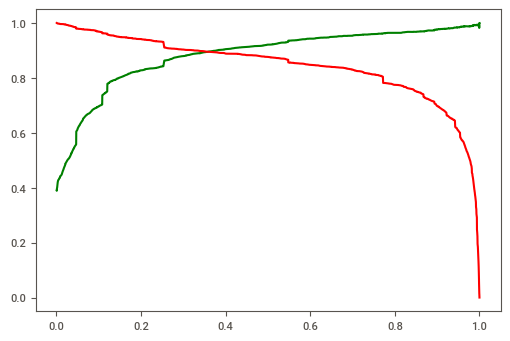

In [369]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making Test Prediction

In [370]:
# Scale the test set using scaler

X_test[['TotalVisits', 'time_website','page_views_visit']] = scaler.transform(X_test[['TotalVisits', 'time_website','page_views_visit']])

In [371]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,time_website,Lead Origin_Lead Add Form,Lead Source_Reference,Last Activity_Email Opened,Country_Unknown,reason_course_Other,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,notable_activity_SMS Sent
7359,0.167116,0,0,0,0,0,0,0,0,0,0,0,1
2201,0.057951,0,0,0,0,0,0,1,0,0,0,0,0
2473,0.582210,0,0,0,0,0,0,0,0,0,1,0,1
8388,0.057053,0,0,0,0,0,0,1,0,0,0,0,0
2949,0.097484,0,0,0,0,0,0,0,0,0,0,1,0


In [372]:
X_test_sm = sm.add_constant(X_test)

In [373]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = result.predict(X_test_sm)

In [374]:
y_test_pred[:10]

7359    0.636674
2201    0.002737
2473    0.998461
8388    0.002727
2949    0.000474
8144    0.706259
8443    0.953952
290     0.046635
8626    0.020915
5709    0.453043
dtype: float64

In [375]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [376]:
y_pred_1.head()

,0
7359,0.636674
2201,0.002737
2473,0.998461
8388,0.002727
2949,0.000474


In [377]:
y_test_df = pd.DataFrame(y_test)

In [378]:
y_test_df['Prospect ID'] = y_test_df.index

In [379]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [380]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7359,0.636674
1,0,2201,0.002737
2,1,2473,0.998461
3,0,8388,0.002727
4,0,2949,0.000474


In [381]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Converted_Prob'})

In [382]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_Prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score
0,7359,0,0.636674,64
1,2201,0,0.002737,0
2,2473,1,0.998461,100
3,8388,0,0.002727,0
4,2949,0,0.000474,0


In [383]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.26 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score,final_Predicted
0,7359,0,0.636674,64,1
1,2201,0,0.002737,0,0
2,2473,1,0.998461,100,1
3,8388,0,0.002727,0,0
4,2949,0,0.000474,0,0


In [384]:
# Check the overall accuracy

acc = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

In [385]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1553,  150],
       [  88,  957]], dtype=int64)

In [386]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [387]:
# Calculate sensitivity
sens = TP / float(TP+FN)

In [388]:
# Calculate specificity
spec = TN / float(TN+FP)

In [389]:
prec = precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

In [390]:
rec = recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

In [391]:
f1 = 2 * rec * prec/(prec + rec)

In [392]:
print(f'Accuracy: {acc}\nSpecificity: {spec}\nSensitivity: {sens}\nPrecision: {prec}\nRecall: {rec}\nF1-Score: {f1}')

Accuracy: 0.913391557496361
Specificity: 0.9119201409277745
Sensitivity: 0.9157894736842105
Precision: 0.8644986449864499
Recall: 0.9157894736842105
F1-Score: 0.8894052044609666


### Final Observation:
#### Let us compare the values obtained for Train & Test:

#### Train Data: 
- Accuracy : 90.98%
- Sensitivity : 90.92%
- Specificity : 91.01%

#### Test Data: 
- Accuracy : 91.33%
- Specificity : 91.19%
- Sensitivity : 91.57%

In [393]:
# Find the top features

feature= pd.DataFrame(result.params).reset_index()

feature.rename(columns={'index':'Feature',0:'Coef_Val'},inplace=True)
feature.sort_values(by='Coef_Val', ascending=False, key=abs,inplace=True)
feature

,Feature,Coef_Val
7,Tags_Closed by Horizzon,6.226220
9,Tags_Lost to EINS,5.296307
12,Tags_switched off,-4.703650
1,time_website,4.336176
11,Tags_Will revert after reading the email,4.114513
10,Tags_Ringing,-3.920141
3,Lead Source_Reference,-3.794606
2,Lead Origin_Lead Add Form,3.551201
0,const,-3.373585
13,notable_activity_SMS Sent,3.209898


As seen from the above metrics we have a very good model with **High Precision and Recall value**. We have got an **F1 Score of 88.94% and a recall value of 91.57%**.

The model would perform in-line with the CEO's expectations of coversion rate of 80%.

The main parameters for the model are as below:
1. Tags
2. time_website
3. Lead Source

<br>

The important categorical features created for the model are as below:
1. Tags_Closed by Horizzon
2. Tags_Lost to EINS
3. Tags_switched off

<br>

The Least important categorical features created for the model are: 
1. Country_Unknown
2. reason_course_Other
2. Last Activity_Email Opened